# **Result visualization**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
RESULTS_ROOT = "../01_simulation/04_results/"
SEEDS = ['42', '1234', '1867', '613', '1001']

In [18]:
p_data = pd.DataFrame()
#READING DATA:
for s in SEEDS:
    filename = RESULTS_ROOT+f'poccup_by_vehs_{s}.csv'
    pf = pd.read_csv(filename)
    pf["seed"] = [s]*len(pf)
    p_data = pd.concat([p_data, pf])
    
p_data["time"] = p_data["time"] - 4*24*60*60

In [19]:
p_data

,veh_id,parking_id,time,occupancy,seed
0,h3479c1:0,pa-11,57.0,0.464286,42
1,h3479c1:0,pa-outside2,57.0,0.000000,42
2,h3479c1:0,pa11,57.0,0.714286,42
3,h3479c1:0,pa-11,58.0,0.464286,42
4,h3479c1:0,pa-outside2,58.0,0.000000,42
...,...,...,...,...,...
625622,h803c1:0,pa-120,86399.0,0.333333,1001
625623,h803c1:0,pa-residential_south,86399.0,0.000000,1001
625624,h803c1:0,pa120,86399.0,0.400000,1001
625625,h243c1:0,pa37,86400.0,0.214286,1001


In [20]:
parkings = p_data["parking_id"].unique()

## Values by parking lots

In [21]:
p_data_by_parking = {}
for p in parkings:
    p_filt = p_data[p_data["parking_id"] == p]
    p_filt = p_filt.groupby("time")["occupancy"].mean()
    p_data_by_parking[p] = p_filt    

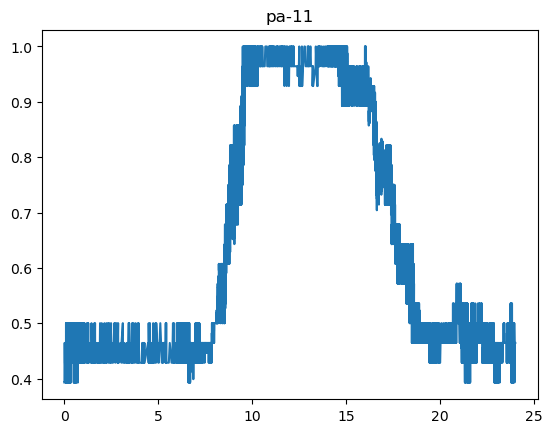

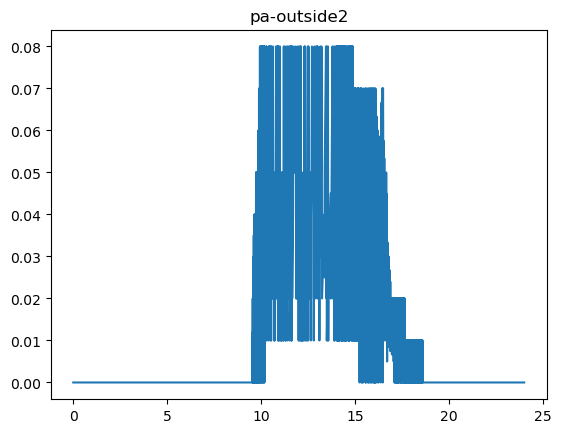

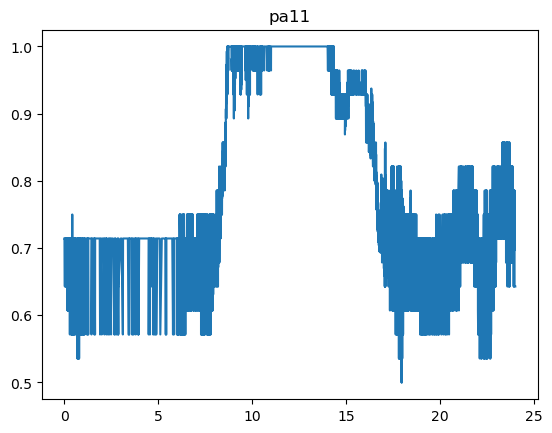

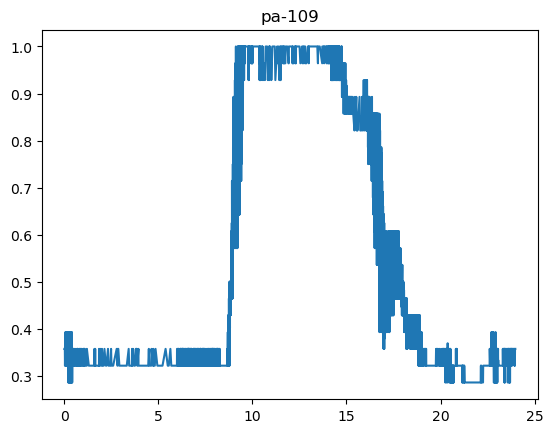

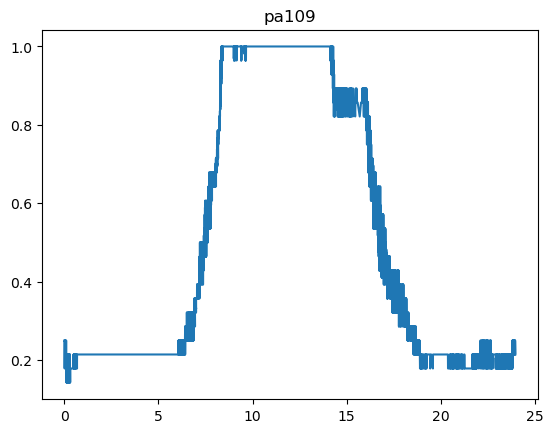

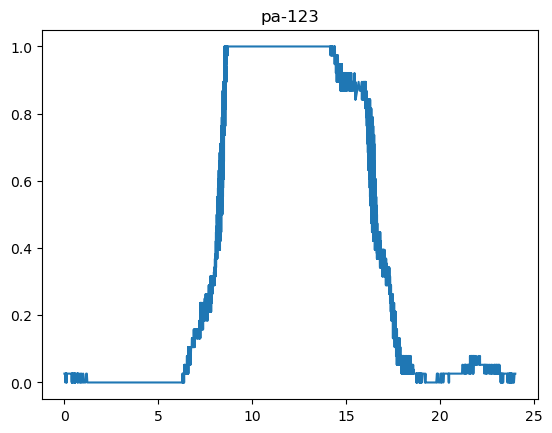

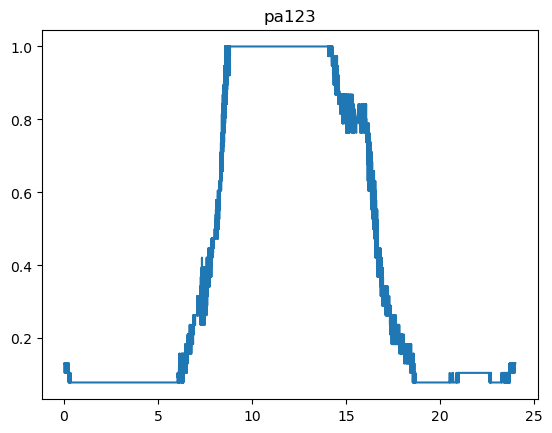

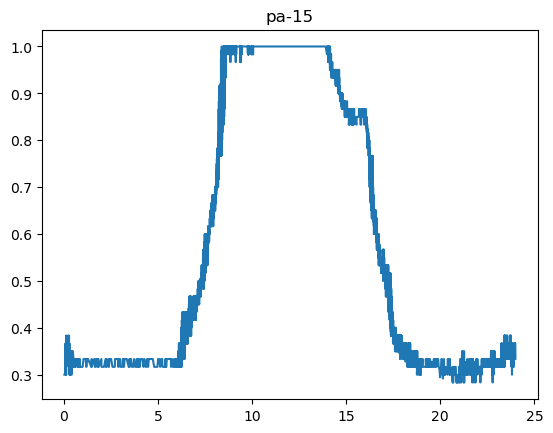

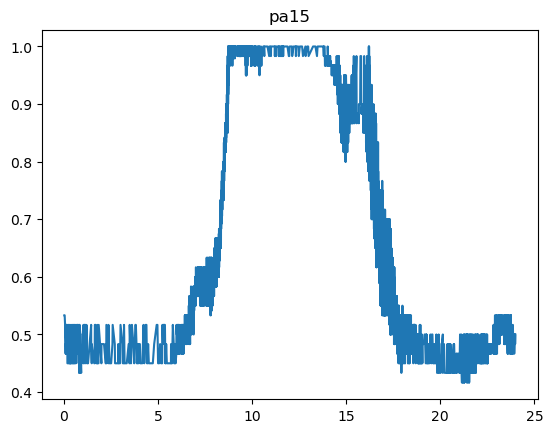

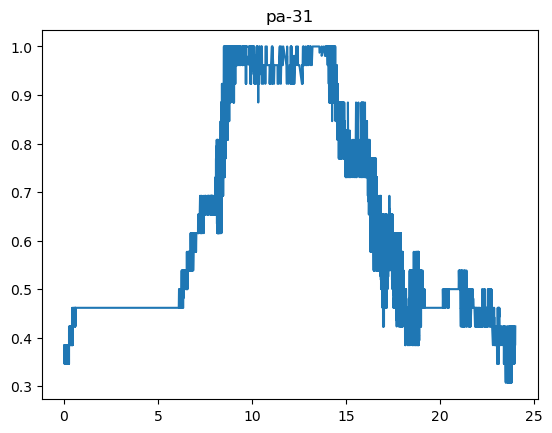

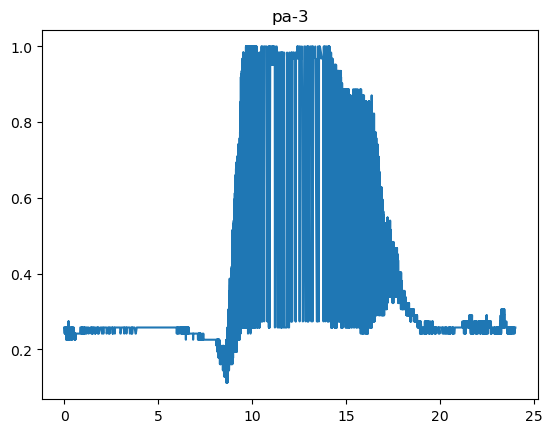

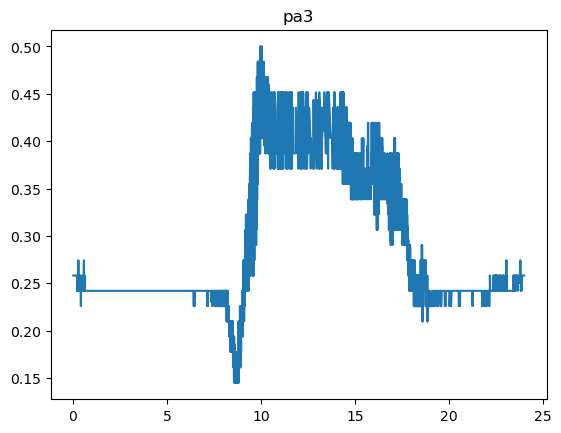

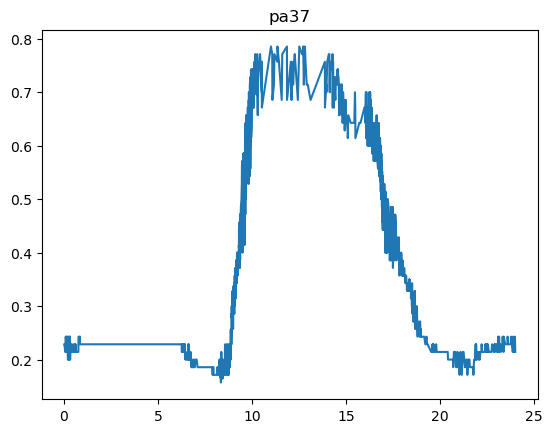

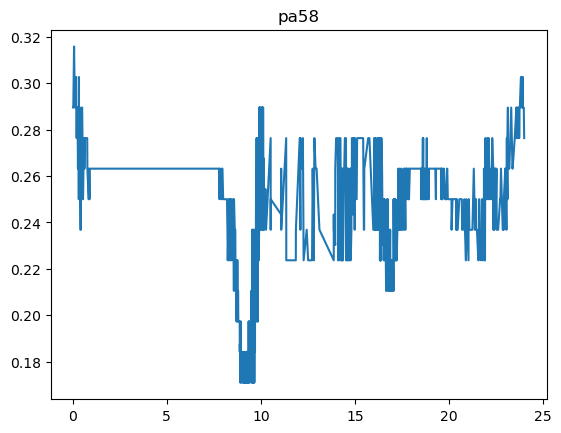

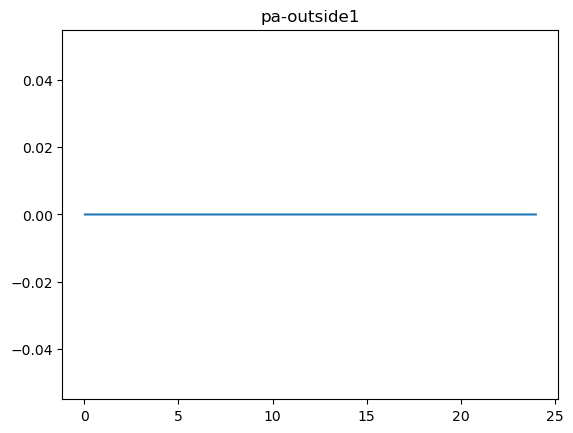

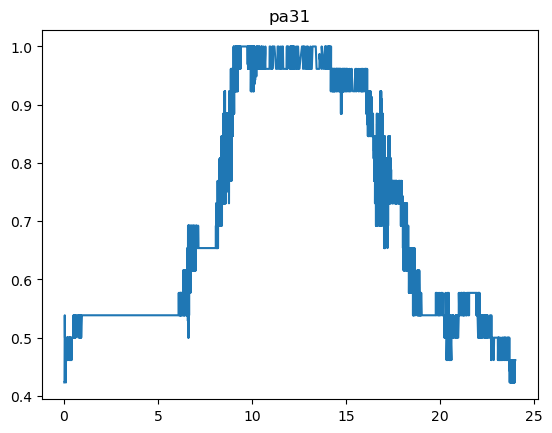

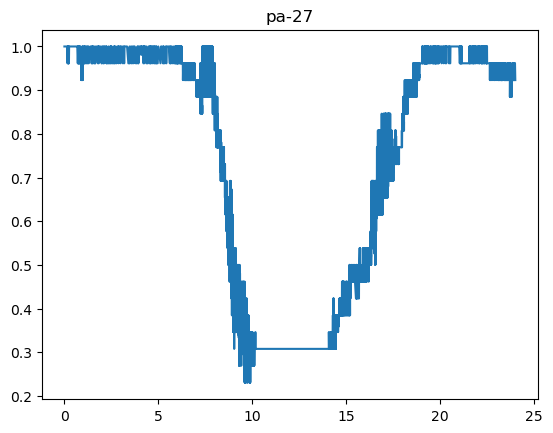

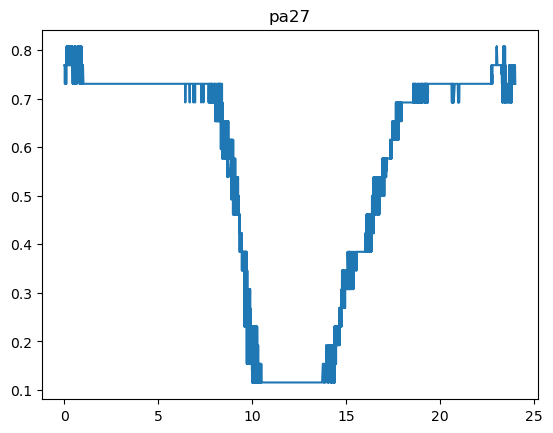

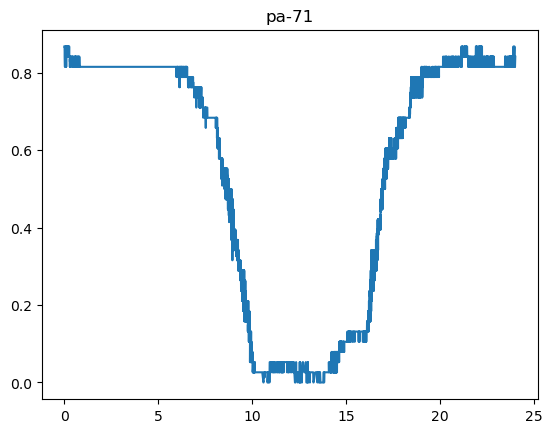

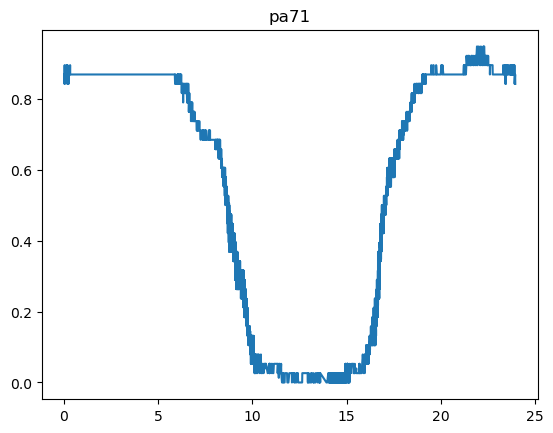

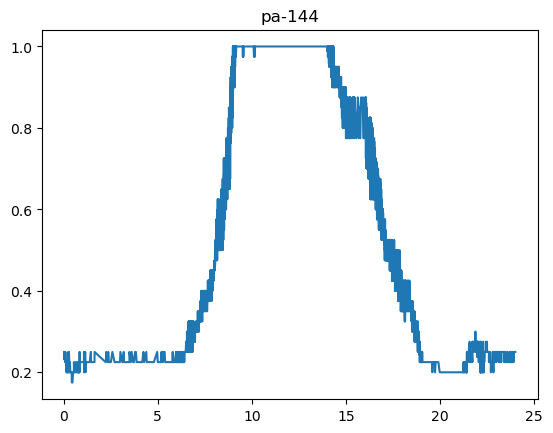

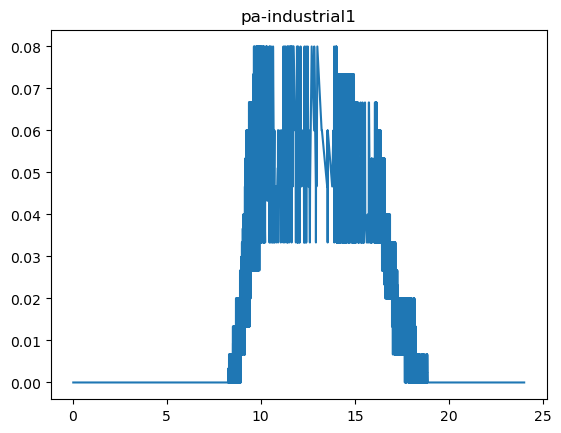

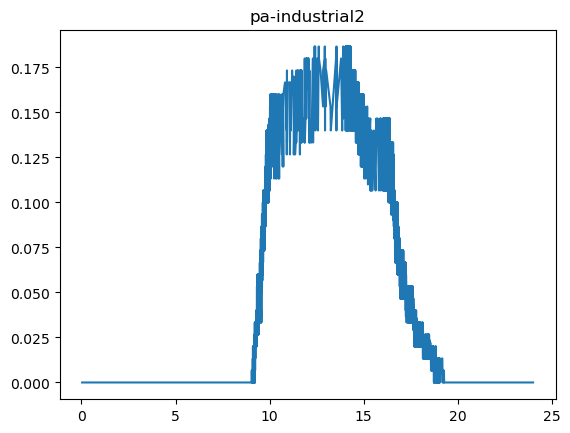

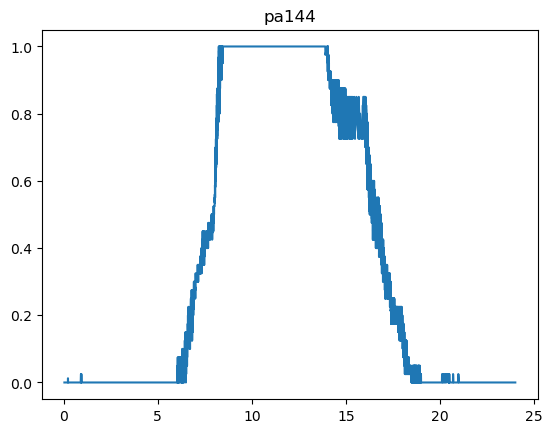

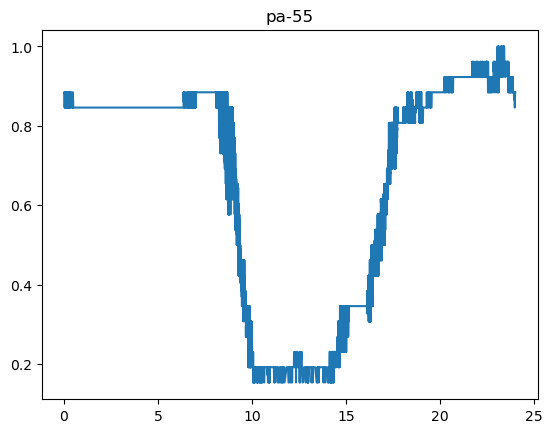

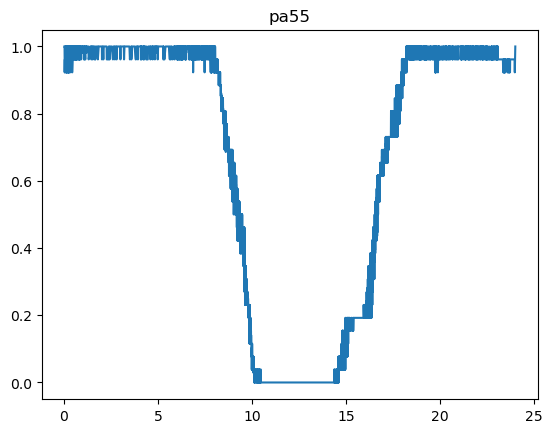

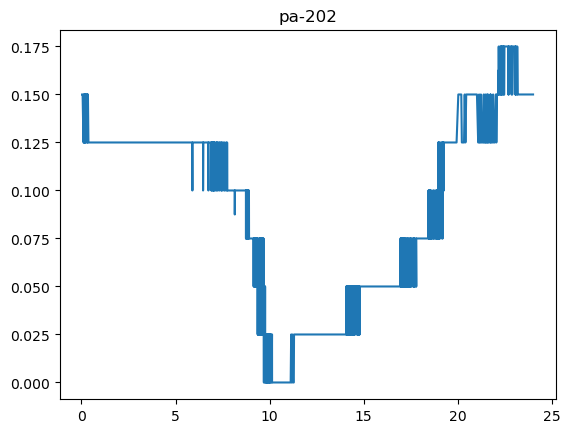

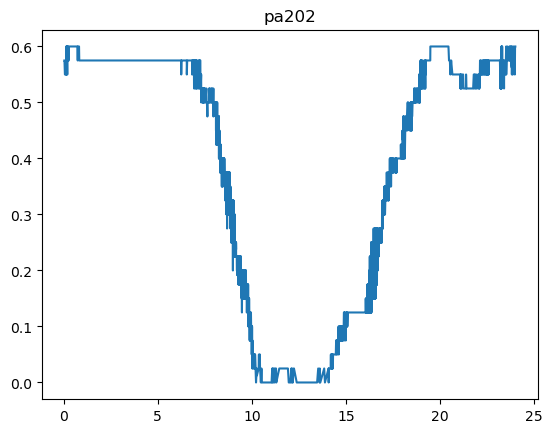

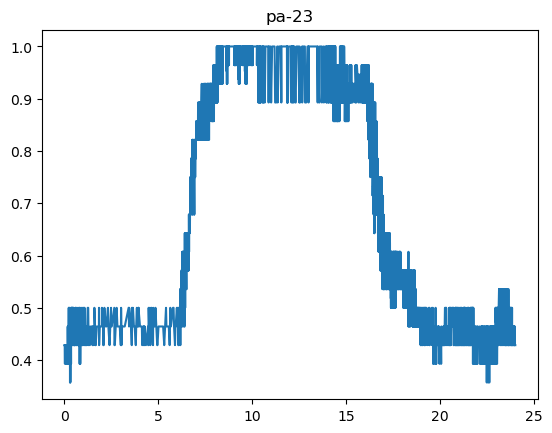

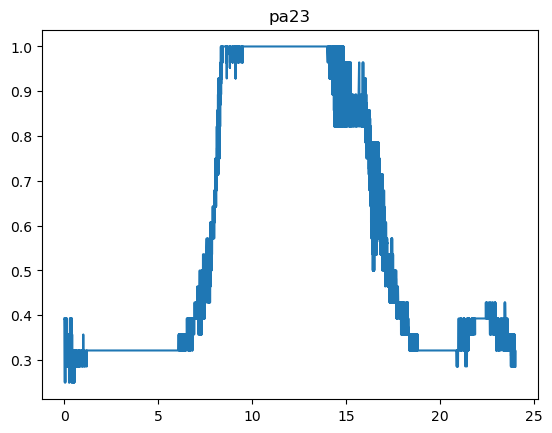

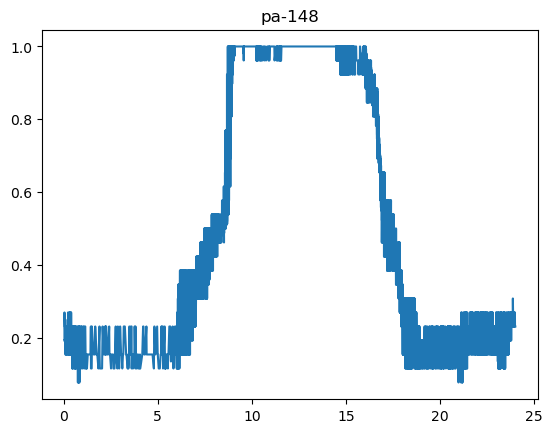

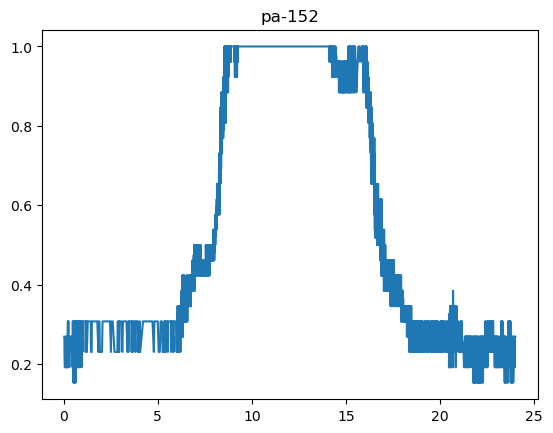

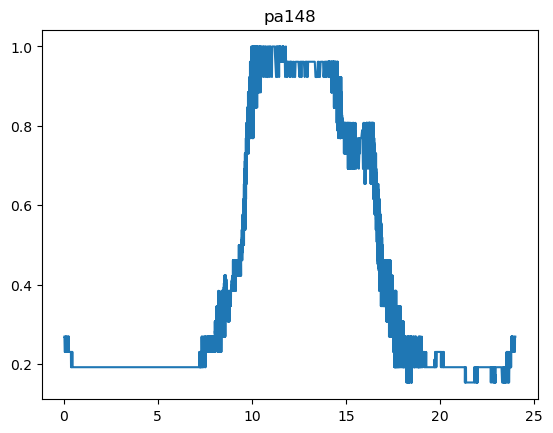

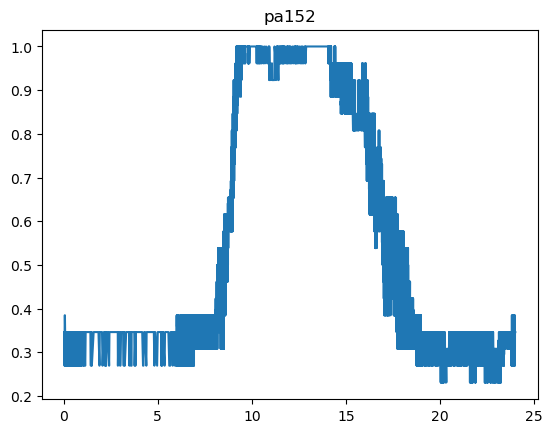

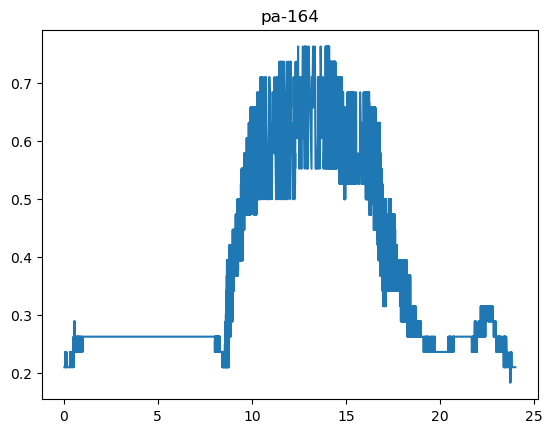

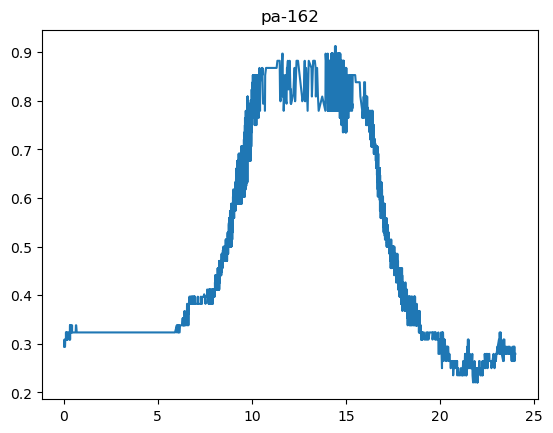

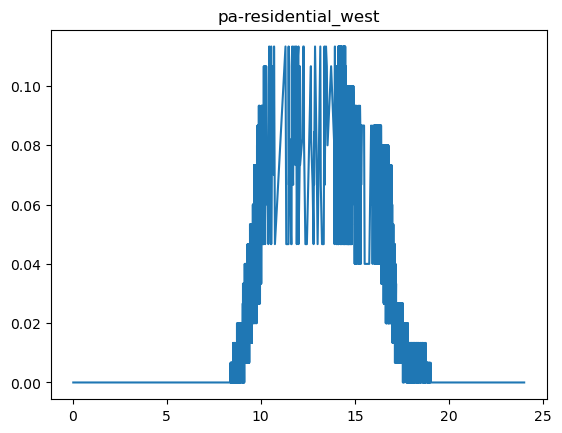

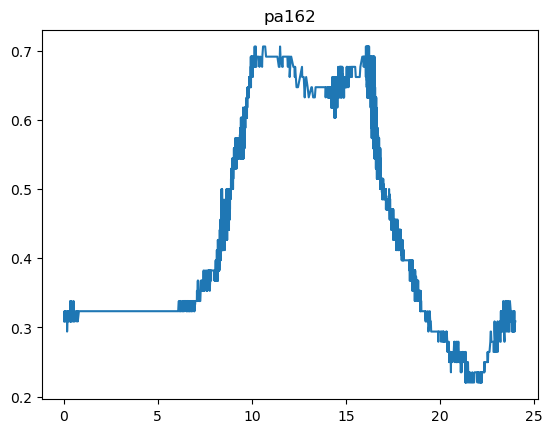

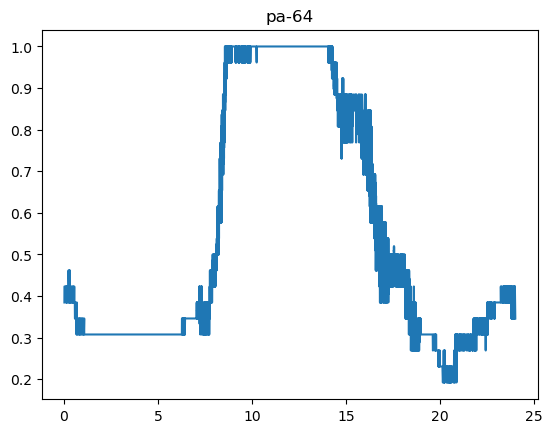

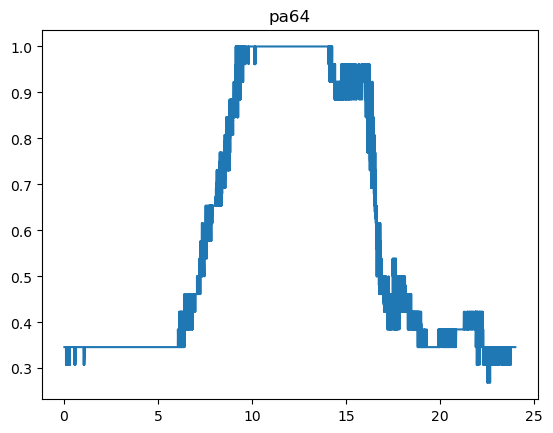

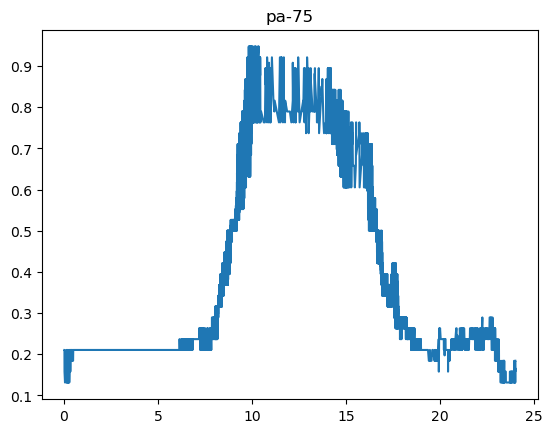

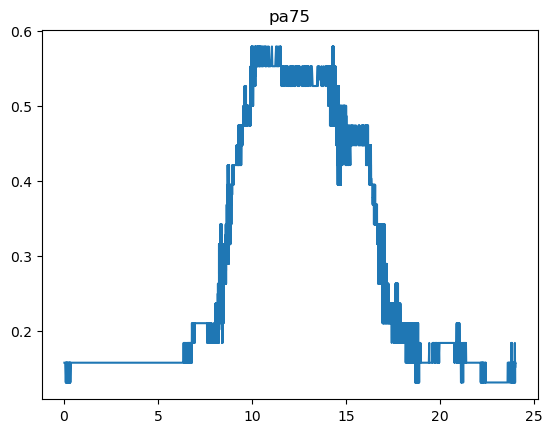

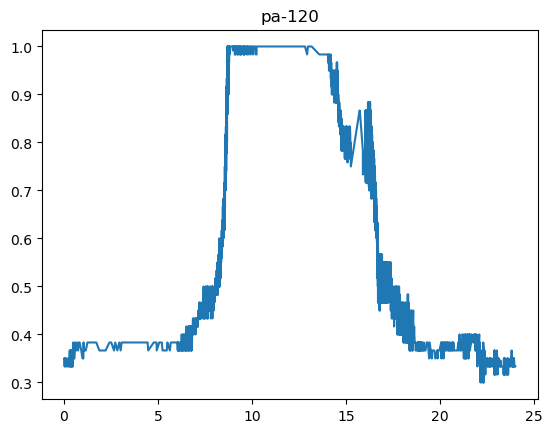

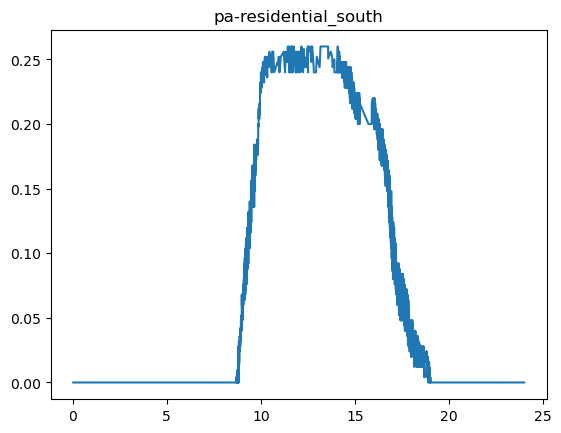

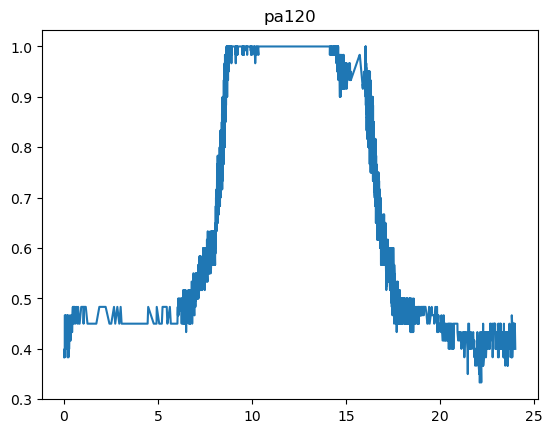

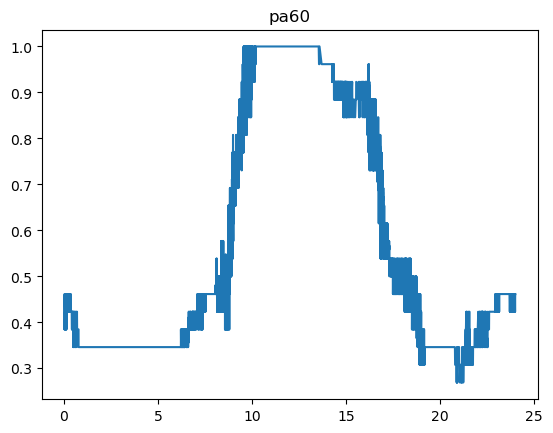

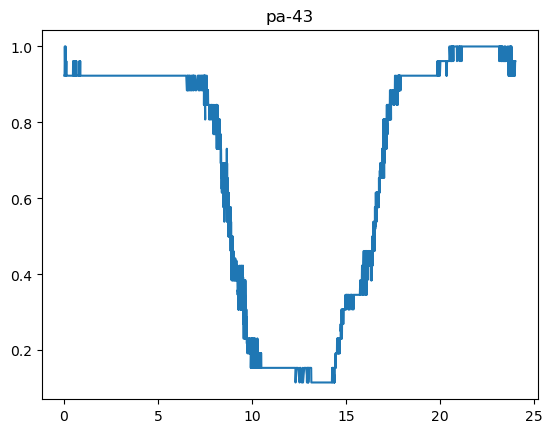

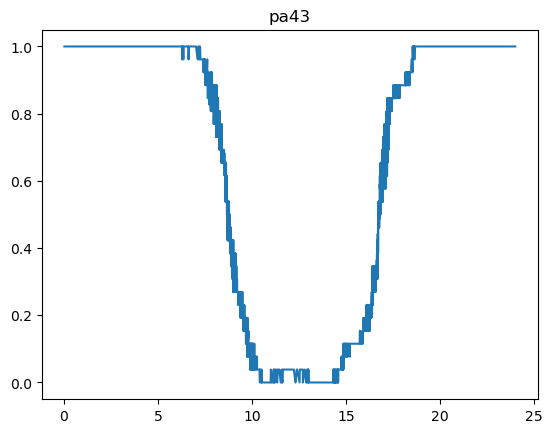

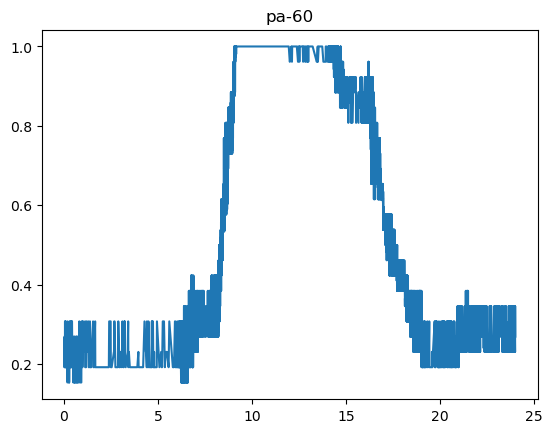

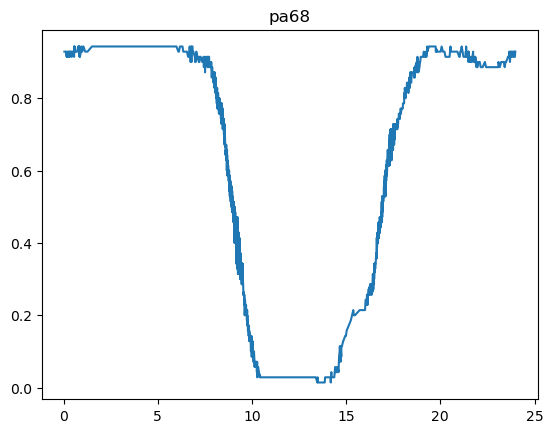

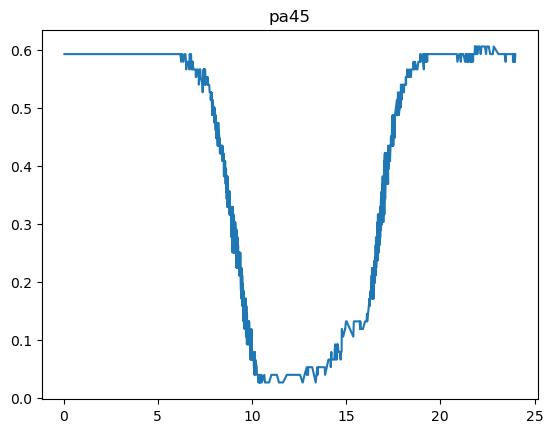

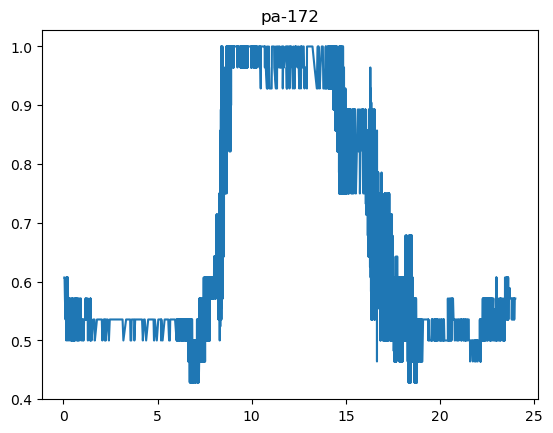

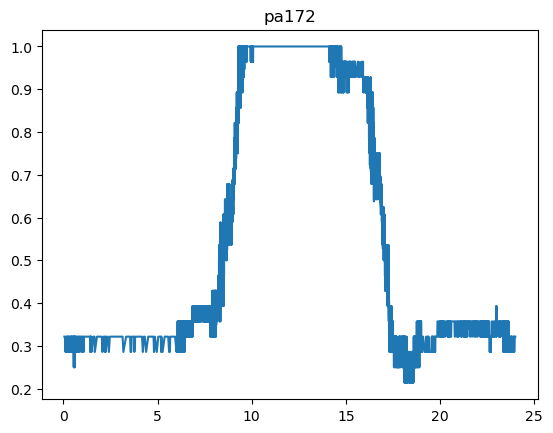

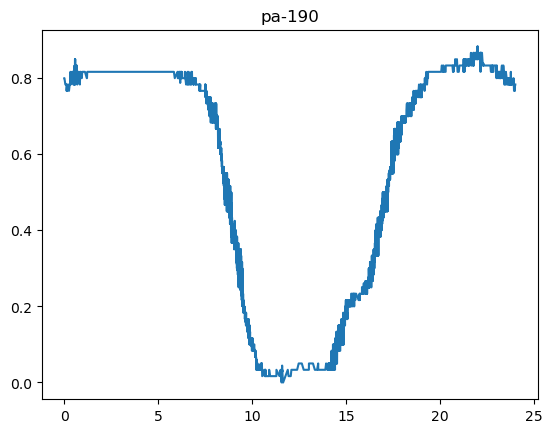

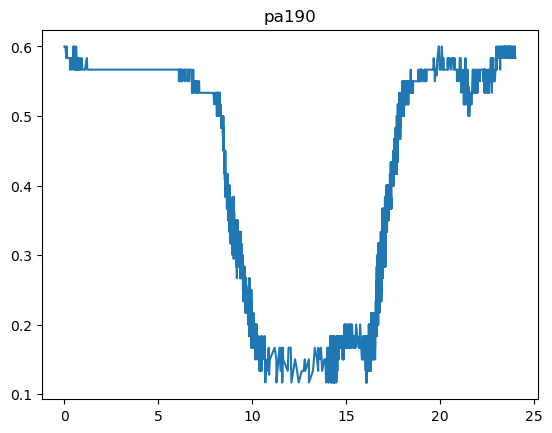

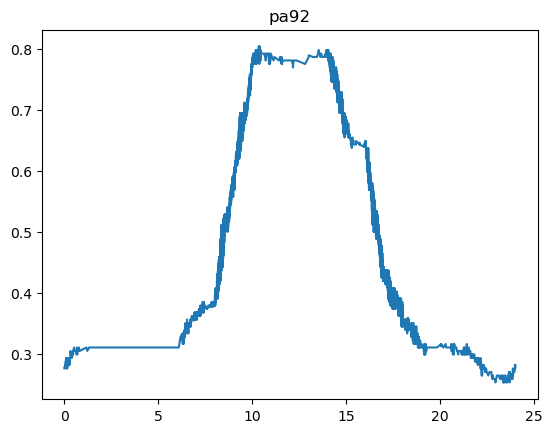

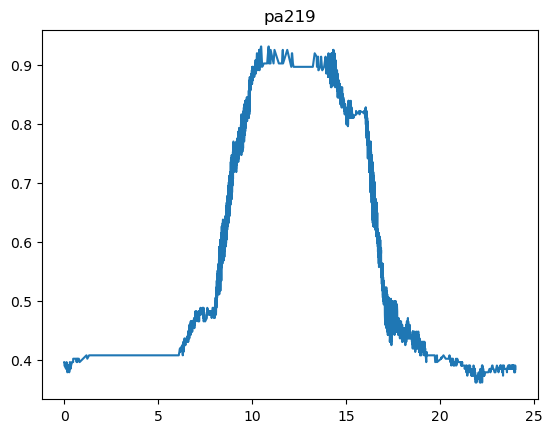

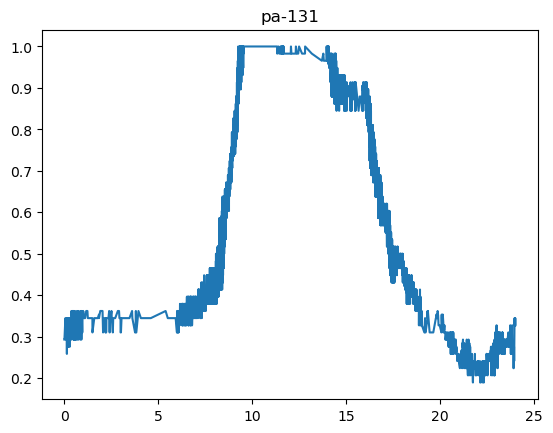

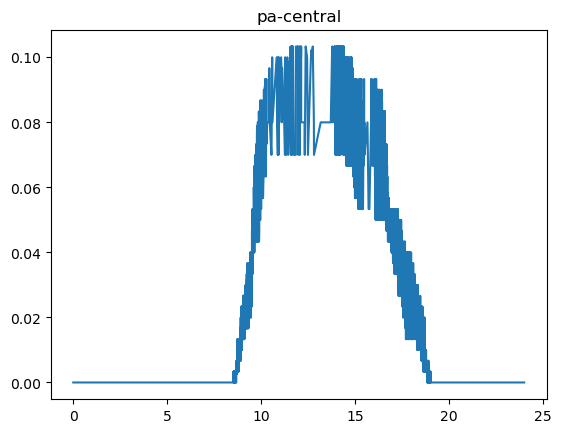

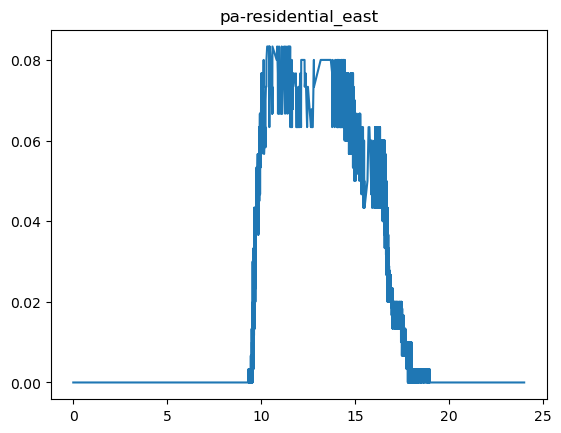

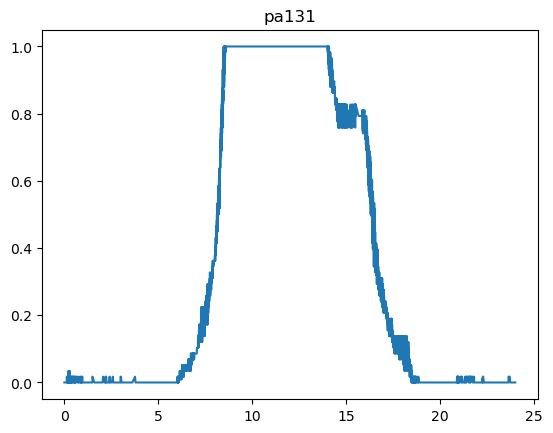

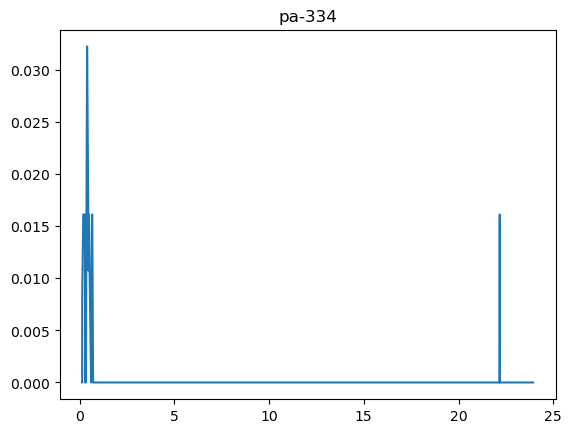

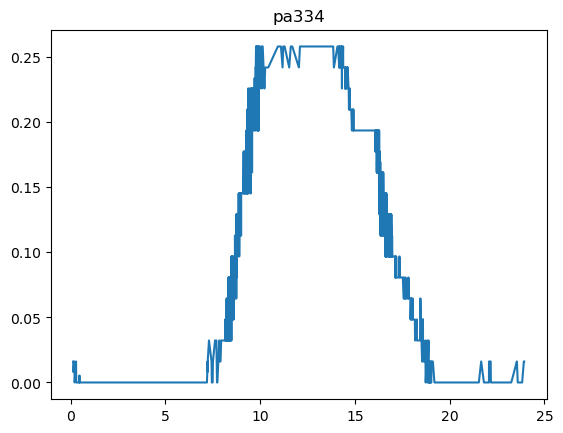

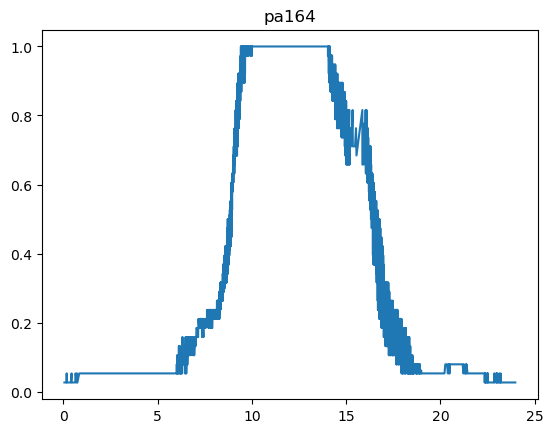

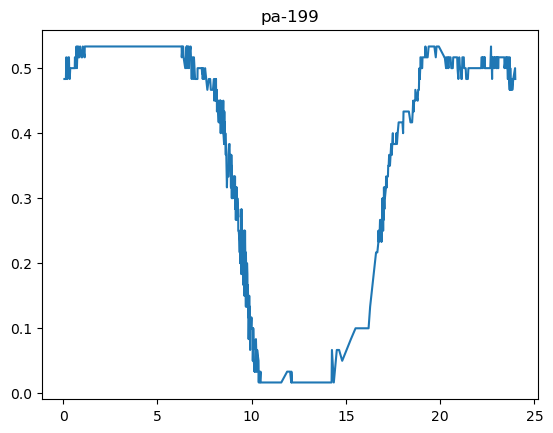

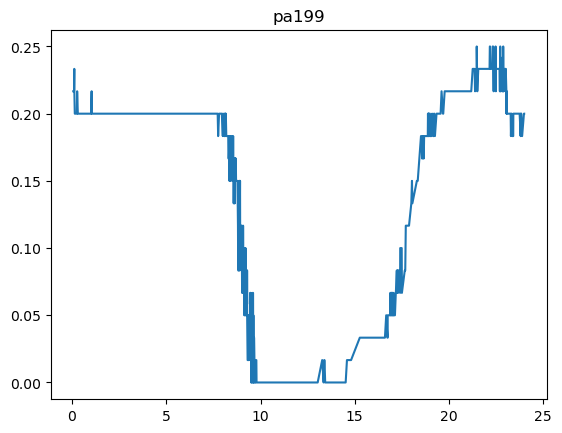

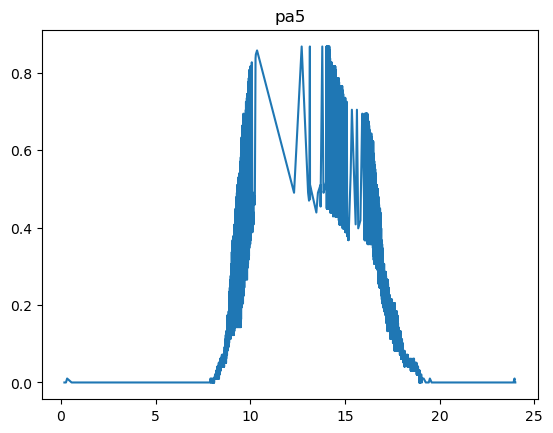

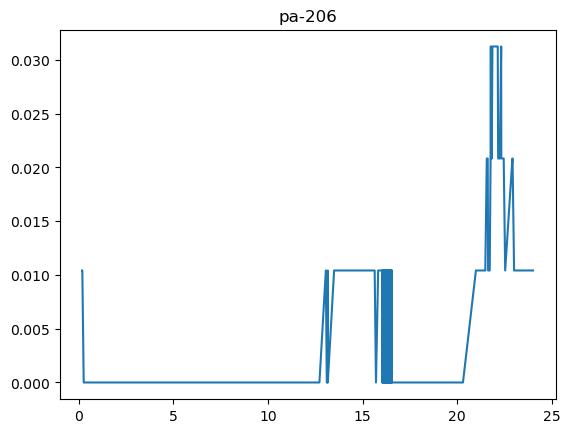

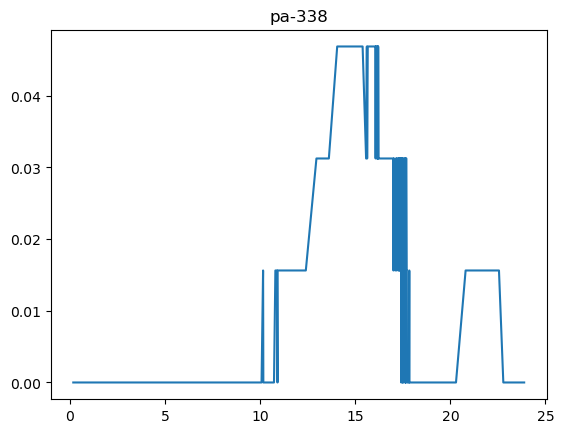

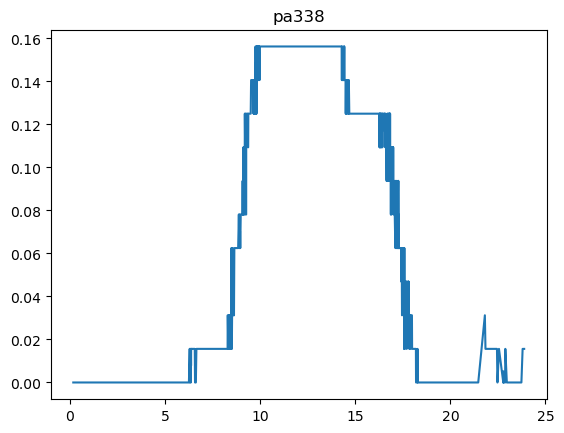

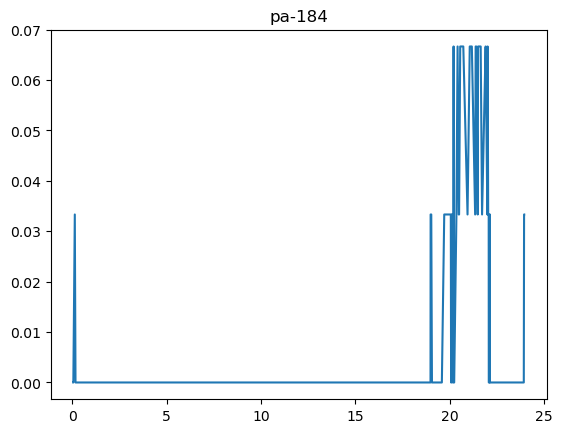

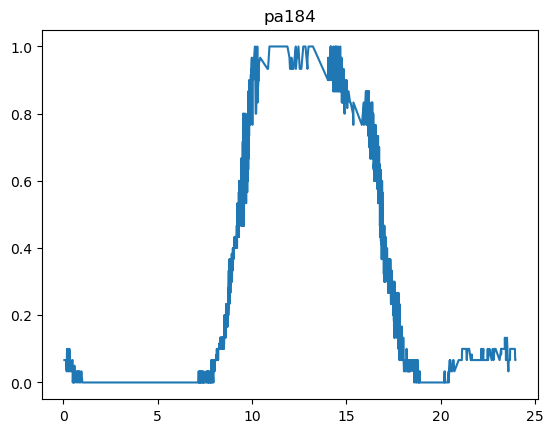

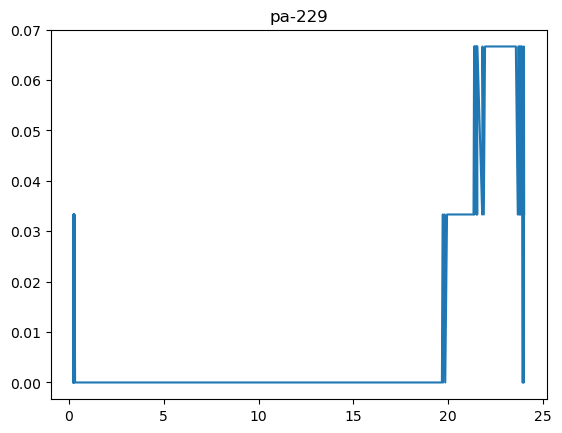

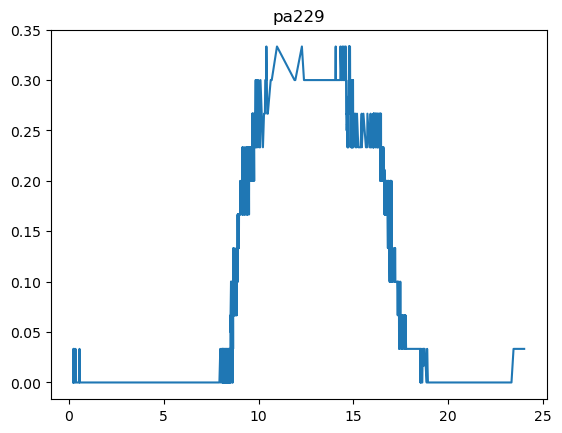

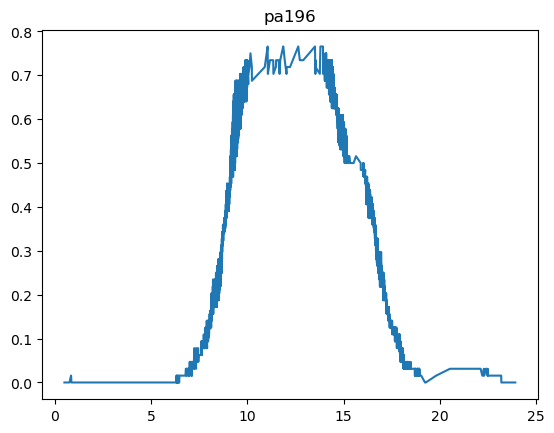

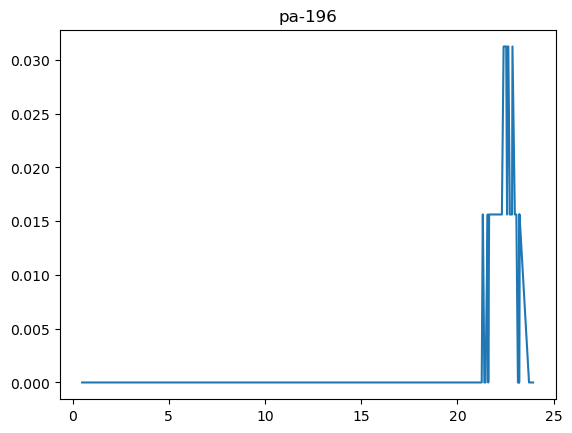

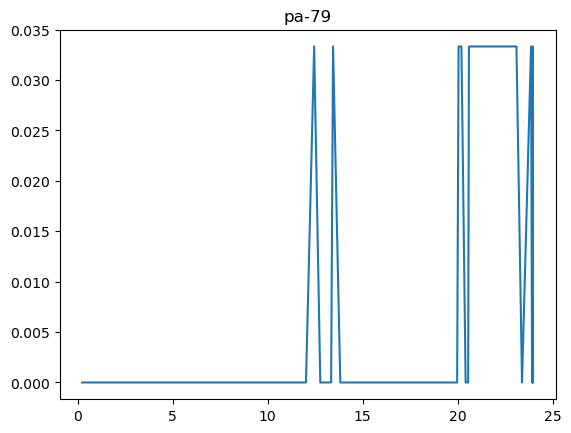

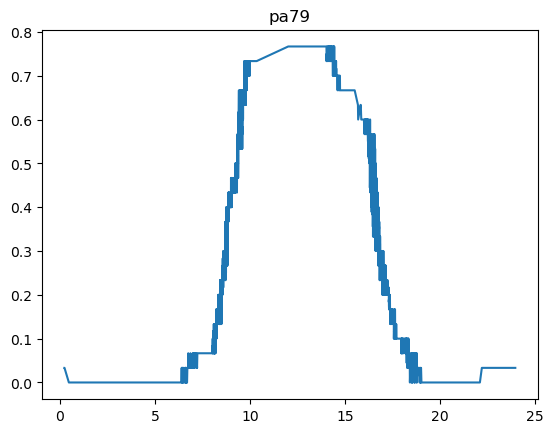

In [30]:
for p in parkings:
    plt.plot(p_data_by_parking[p].index/(60*60), p_data_by_parking[p].values)
    plt.title(p)
    plt.show()